In [8]:
import matplotlib.pyplot as plt
from nltk import word_tokenize, FreqDist
import pandas as pd
from gensim.models import Word2Vec


In [62]:
df = pd.read_csv(r"D:\Proyectos\nllp_antitrust.v1\corpus_rol.csv")
df

,case_name,rule_of_law,rol_preprocessed
0,United States v. Trans-Missouri Freight Assn. ...,The Sherman Act’s prohibition on agreements in...,sherman act prohibition agreement restraint tr...
1,United States v. Addyston Pipe & Steel Co. Fed...,A combination with the sole purpose to regulat...,combination sole purpose regulate price violat...
2,"Summit Health, Ltd. v. Pinhas Health care oper...",Violation of the Sherman Act is determined by ...,violation sherman act determined potential har...
3,Illinois Brick Co. v. Illinois Manufacturer (D...,Only direct purchasers from those engaged in u...,direct purchaser engaged unlawful manufacturin...
4,Reiter v. Sonotone Corp. Consumer (P) v. Manuf...,A consumer of retail goods and services has st...,consumer retail good service standing sue dama...
...,...,...,...
104,Fisher v. City of Berkeley Landlord (P) v. Cit...,Rent control ordinances do not conflict with f...,rent control ordinance conflict federal antitr...
105,California Retail Liquor Dealers Assn. v. Midc...,A state policy is immune from antitrust regula...,state policy immune antitrust regulation clear...
106,Hallie v. City of Eau Claire Unincorporated to...,A municipality’s anticompetitive activities ar...,municipality anticompetitive activity protecte...
107,City of Columbia & Columbia Outdoor Advertisin...,"A city may, through regulation, give a busines...",city may regulation give business concern de f...


***1. Word Embeddings***

Here we will do a specific tokenization. In the following models, we will use another approach

In [5]:
# We will tokenize each cell in "rol_preprocessed"

sentences = [word_tokenize(doc) for doc in df["rol_preprocessed"]]

In [14]:
type(sentences)

list

In [6]:
print(sentences[:5])

[['sherman', 'act', 'prohibition', 'agreement', 'restraint', 'trade', 'limited', 'unreasonable', 'restraint'], ['combination', 'sole', 'purpose', 'regulate', 'price', 'violative', 'public', 'policy', 'sherman', 'act'], ['violation', 'sherman', 'act', 'determined', 'potential', 'harm', 'would', 'ensue', 'conspiracy', 'successful', 'actual', 'occurrence'], ['direct', 'purchaser', 'engaged', 'unlawful', 'manufacturing', 'level', 'may', 'seek', 'damage', 'antitrust', 'violation'], ['consumer', 'retail', 'good', 'service', 'standing', 'sue', 'damage', 'clayton', 'act']]


In [9]:
n_dim = 8
model = Word2Vec(sentences, vector_size=n_dim, window=5, min_count=1, sg=1) # Documentar mejor y explicar

In [60]:
model.wv.most_similar("sherman")

[('using', 0.9195469617843628),
 ('item', 0.8805657029151917),
 ('merely', 0.8490035533905029),
 ('agreement', 0.8327290415763855),
 ('compete', 0.8264014720916748),
 ('expert', 0.7800807356834412),
 ('proscribed', 0.7677909731864929),
 ('barrier', 0.7500004172325134),
 ('sold', 0.7346517443656921),
 ('law', 0.7316508293151855)]

***2. Clustering***

This section is based on the repository nlp_lss_2022 by Elliot Ash

In [45]:
# We will read our document term matrix

X = pd.read_pickle(r'D:\Proyectos\nllp_antitrust.v1\X.pkl').toarray()


1. K-means clustering

In [63]:
from sklearn.cluster import KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(X)
doc_clusters = km.labels_.tolist()

In [64]:
df['cluster'] = doc_clusters
df[df['cluster']==3]['rol_preprocessed']

17    market inelastic number small exchange price i...
67    establish competitive injury due rival low pri...
91    manufacturer may held liable price discriminat...
96    belief rather absolute certainty price concess...
97    meeting competition defense may used defendant...
Name: rol_preprocessed, dtype: object

In [65]:
df

,case_name,rule_of_law,rol_preprocessed,cluster
0,United States v. Trans-Missouri Freight Assn. ...,The Sherman Act’s prohibition on agreements in...,sherman act prohibition agreement restraint tr...,2
1,United States v. Addyston Pipe & Steel Co. Fed...,A combination with the sole purpose to regulat...,combination sole purpose regulate price violat...,2
2,"Summit Health, Ltd. v. Pinhas Health care oper...",Violation of the Sherman Act is determined by ...,violation sherman act determined potential har...,2
3,Illinois Brick Co. v. Illinois Manufacturer (D...,Only direct purchasers from those engaged in u...,direct purchaser engaged unlawful manufacturin...,4
4,Reiter v. Sonotone Corp. Consumer (P) v. Manuf...,A consumer of retail goods and services has st...,consumer retail good service standing sue dama...,9
...,...,...,...,...
104,Fisher v. City of Berkeley Landlord (P) v. Cit...,Rent control ordinances do not conflict with f...,rent control ordinance conflict federal antitr...,9
105,California Retail Liquor Dealers Assn. v. Midc...,A state policy is immune from antitrust regula...,state policy immune antitrust regulation clear...,9
106,Hallie v. City of Eau Claire Unincorporated to...,A municipality’s anticompetitive activities ar...,municipality anticompetitive activity protecte...,9
107,City of Columbia & Columbia Outdoor Advertisin...,"A city may, through regulation, give a busines...",city may regulation give business concern de f...,1


In [70]:
df[df['cluster']==2]['rule_of_law'].head()

0     The Sherman Act’s prohibition on agreements in...
1     A combination with the sole purpose to regulat...
2     Violation of the Sherman Act is determined by ...
13    A combination to artificially set prices is a ...
14    A cooperative enterprise that is neither an un...
Name: rule_of_law, dtype: object

**2. Silhoutte Score**

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [72]:
from sklearn.metrics import silhouette_score
silhouette_score(X, km.labels_)

0.16363318395716234

In [73]:
sil_scores = []
for n in range(2, num_clusters):
    km = KMeans(n_clusters=n)
    km.fit(X)
    sil_scores.append(silhouette_score(X, km.labels_))

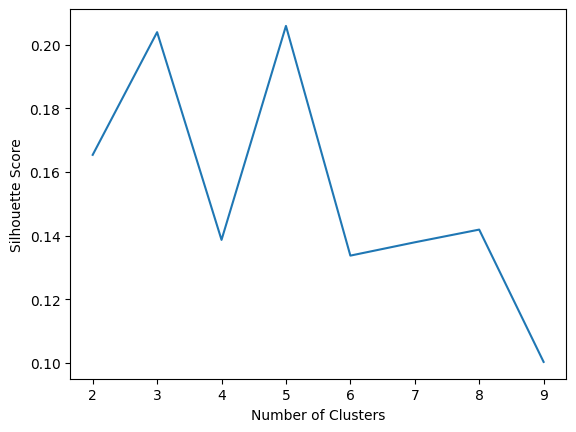

In [74]:
import matplotlib.pyplot as plt 
plt.plot(range(2, num_clusters), sil_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [75]:
opt_sil_score = max(sil_scores[5:20])
sil_scores.index(opt_sil_score)
opt_num_cluster = range(2, num_clusters)[sil_scores.index(opt_sil_score)]
print('The optimal number of clusters is %s' %opt_num_cluster)

The optimal number of clusters is 8


In [76]:
km = KMeans(n_clusters=opt_num_cluster)
km.fit(X)
doc_clusters = km.labels_.tolist()

df['cluster_mean'] = doc_clusters
df[df['cluster_mean']==1]['rol_preprocessed']

23     limitation imposed upon member cooperative org...
25     per se illegal sherman act lawful economically...
39     concerted refusal deal characterized group boy...
45     vertical maximum price fixing per se violation...
102    horizontal agreement market competitor conduct...
Name: rol_preprocessed, dtype: object

In [81]:
for row in df[df['cluster_mean']==1]['rule_of_law']:
    print(row)

Limitations imposed upon members of a cooperative organization on the manner in which the product is marketed are not illegal per se, but if such limitations hamper competition, they violate the Sherman Act. 
It is not per se illegal under § 1 of the Sherman Act for a lawful, economically integrated joint venture to set the prices at which the joint venture sells its products. 
Not all concerted refusals to deal should be characterized as group boycotts limiting the ability to compete and therefore per se violative of § 1 of the Sherman Act, 15 U.S.C. 1. 
Vertical maximum price fixing is not a per se violation of § 1 of the Sherman Act. 
Horizontal agreements between market competitors to price-fix or to conduct a boycott are per se violations of the Sherman Act § 1 prohibition against restraints of trade even if they contain an expressive component suggestive of First Amendment protection. 


3. K-Medoids

In [83]:
from sklearn_extra.cluster import KMedoids

kmed = KMedoids(n_clusters=opt_num_cluster)
kmed.fit(X)
doc_clusters = kmed.labels_.tolist()

df['cluster_med'] = doc_clusters
df[df['cluster_med']==1]['rol_preprocessed']

d:\Programas\anaconda3\envs\nllp_antitrust_v.1\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
d:\Programas\anaconda3\envs\nllp_antitrust_v.1\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
d:\Programas\anaconda3\envs\nllp_antitrust_v.1\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
d:\Programas\anaconda3\envs\nllp_antitrust_v.1\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  warnings.warn(
d:\P

3      direct purchaser engaged unlawful manufacturin...
8      indirect highly speculative damage may even ca...
26     unlawful conspiracy restraint trade may inferr...
30     business conduct oligopolistic industry may la...
34     covenant compete may legal ancillary productiv...
48     buyer seller state relevant market may still f...
56     full system sale unit may reasonable legitimat...
59     market control industry dominance solely due e...
62     distinctive type service within larger market ...
63     firm even monopolist may keep innovation secre...
76     stock acquisition tendency foreclose substanti...
80     effect merger may substantially lessen competi...
82     prima facie case based statistical showing mar...
85     merger must preliminarily enjoined federal tra...
90     quantity discount may justified actual saving ...
91     manufacturer may held liable price discriminat...
95     discount based cost saving may passed arbitrar...
97     meeting competition defe

In [86]:
for row in df[df['cluster_med']==1]['rule_of_law']:
    print(row)

Only direct purchasers from those engaged in unlawful price-fixing at the manufacturing level may seek damages for antitrust violations. 
Indirect, highly speculative damages that may not even be caused by the alleged antitrust violation are not cognizable under § 4 of the Clayton Act. 
An unlawful conspiracy in restraint of trade may be inferred from the facts, such as concerted action departing from previous practices. 
Before business conduct in an oligopolistic industry may be labeled “unfair,” there must be proof of collusion, an anticompetitive purpose, or absence of an independent legitimate reason for the conduct. 
A covenant not to compete may be legal if ancillary to a productive venture. 
Where the buyer and seller are in the same state, the relevant market may still be found to be regional or even national. 
A full system sales unit may be reasonable where there are legitimate reasons for selling normally separate items in a combined form and economic conditions justify a p

***Topic Modeling with LDA***

In [55]:
# clean document
from gensim.utils import simple_preprocess
import spacy
from spacy.tokenizer import Tokenizer
from tqdm import tqdm as tq
nlp = spacy.load('en_core_web_sm')
# this is faster and we don't need the whole grammatical parse analysis

def tokenize(x, nlp):
    # lemmatize and lowercase without stopwords, punctuation and numbers
    return [w.lemma_.lower() for w in nlp(x) if not w.is_stop and not w.is_punct and not w.is_digit and len(w) > 2]


In [56]:
df["rol_processed"] = df.rule_of_law.apply(lambda x: tokenize(x, nlp))

In [92]:
df

,case_name,rule_of_law,rol_preprocessed,cluster,cluster_mean,cluster_med
0,United States v. Trans-Missouri Freight Assn. ...,The Sherman Act’s prohibition on agreements in...,sherman act prohibition agreement restraint tr...,2,6,4
1,United States v. Addyston Pipe & Steel Co. Fed...,A combination with the sole purpose to regulat...,combination sole purpose regulate price violat...,2,6,4
2,"Summit Health, Ltd. v. Pinhas Health care oper...",Violation of the Sherman Act is determined by ...,violation sherman act determined potential har...,2,6,4
3,Illinois Brick Co. v. Illinois Manufacturer (D...,Only direct purchasers from those engaged in u...,direct purchaser engaged unlawful manufacturin...,4,2,1
4,Reiter v. Sonotone Corp. Consumer (P) v. Manuf...,A consumer of retail goods and services has st...,consumer retail good service standing sue dama...,9,0,0
...,...,...,...,...,...,...
104,Fisher v. City of Berkeley Landlord (P) v. Cit...,Rent control ordinances do not conflict with f...,rent control ordinance conflict federal antitr...,9,0,0
105,California Retail Liquor Dealers Assn. v. Midc...,A state policy is immune from antitrust regula...,state policy immune antitrust regulation clear...,9,0,0
106,Hallie v. City of Eau Claire Unincorporated to...,A municipality’s anticompetitive activities ar...,municipality anticompetitive activity protecte...,9,0,0
107,City of Columbia & Columbia Outdoor Advertisin...,"A city may, through regulation, give a busines...",city may regulation give business concern de f...,1,2,1


In [58]:
# randomize document order
from random import shuffle
shuffle(df['rol_processed'])

# creating the term dictionary
from gensim import corpora
dictionary = corpora.Dictionary(df['rol_processed'])
# filter extremes, drop all words appearing in less than 10 paragraphs and all words appearing in at least every third paragraph
# dictionary.filter_extremes(no_below=10, no_above=0.33, keep_n=1000)
print (len(dictionary))

# creating the document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['rol_processed']]

# train LDA with 10 topics and print
from gensim.models.ldamodel import LdaModel
lda = LdaModel(doc_term_matrix, num_topics=10, 
               id2word = dictionary, passes=3)
lda.show_topics(formatted=True)

630


d:\Programas\anaconda3\envs\nllp_antitrust_v.1\Lib\random.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]
d:\Programas\anaconda3\envs\nllp_antitrust_v.1\Lib\random.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]
d:\Programas\anaconda3\envs\nllp_antitrust_v.1\Lib\random.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]
d:\Programas\anaconda3\envs\nll

[(0,
  '0.016*"product" + 0.015*"base" + 0.015*"reduction" + 0.015*"condition" + 0.009*"price" + 0.009*"manufacturer" + 0.009*"discriminate" + 0.009*"showing" + 0.009*"compete" + 0.008*"market"'),
 (1,
  '0.028*"competition" + 0.025*"price" + 0.025*"unlawful" + 0.015*"act" + 0.014*"acquire" + 0.014*"company" + 0.014*"copyright" + 0.011*"conduct" + 0.010*"merely" + 0.010*"group"'),
 (2,
  '0.035*"act" + 0.022*"competitor" + 0.020*"sherman" + 0.019*"product" + 0.017*"market" + 0.016*"injury" + 0.014*"antitrust" + 0.013*"joint" + 0.013*"merger" + 0.013*"allege"'),
 (3,
  '0.031*"competition" + 0.026*"market" + 0.019*"sherman" + 0.019*"act" + 0.019*"illegal" + 0.013*"power" + 0.013*"product" + 0.013*"violate" + 0.013*"tie" + 0.013*"impose"'),
 (4,
  '0.050*"product" + 0.031*"act" + 0.023*"sherman" + 0.019*"actual" + 0.015*"price" + 0.015*"violation" + 0.015*"restraint" + 0.014*"cost" + 0.014*"discount" + 0.013*"defendant"'),
 (5,
  '0.027*"price" + 0.024*"antitrust" + 0.020*"law" + 0.017*"

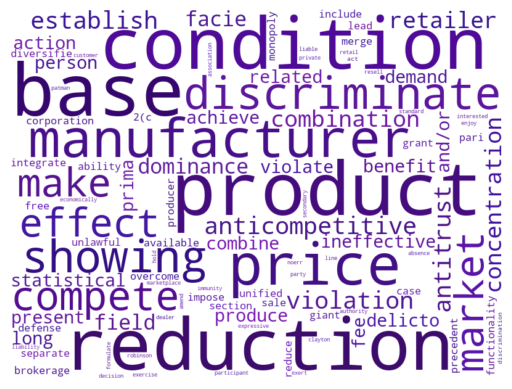

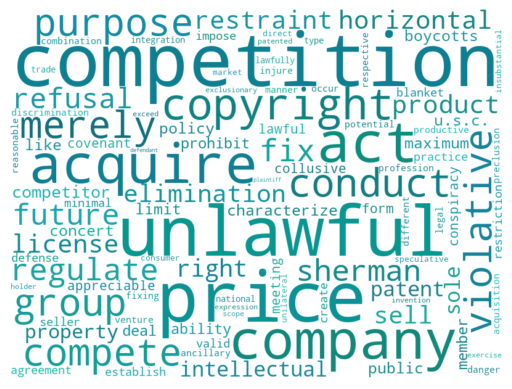

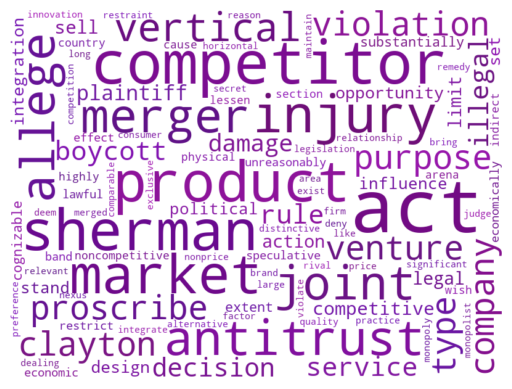

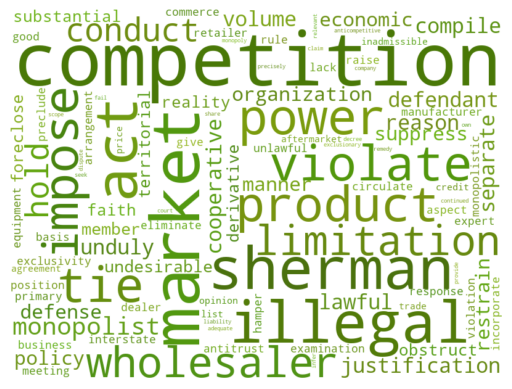

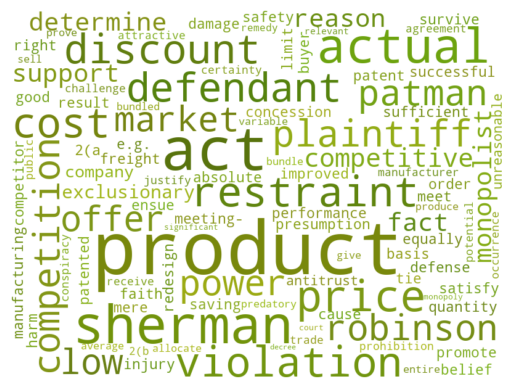

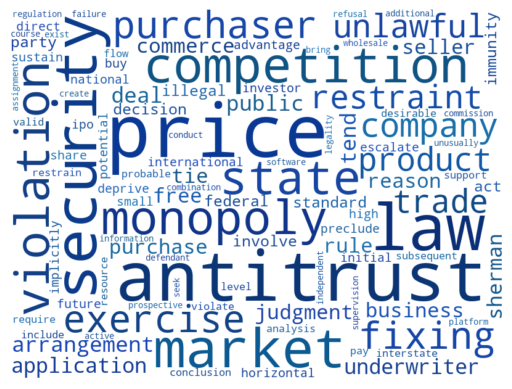

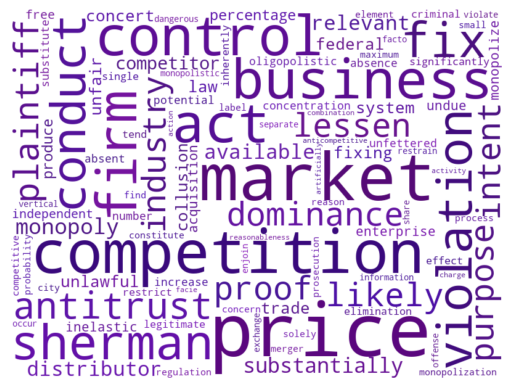

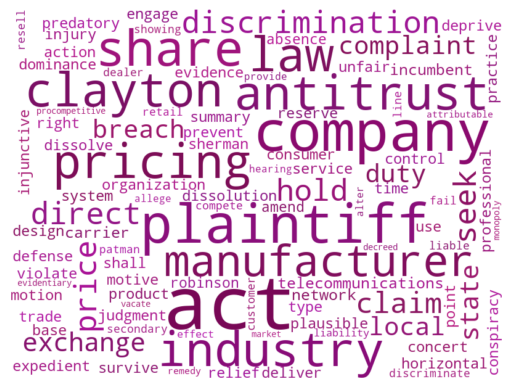

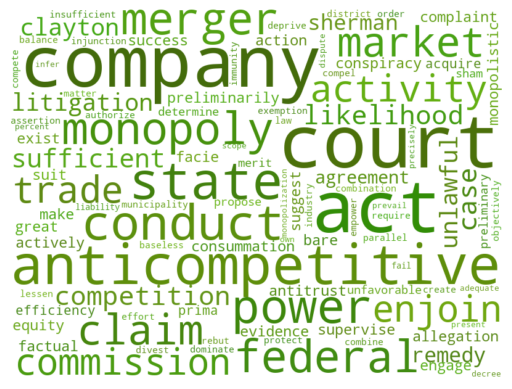

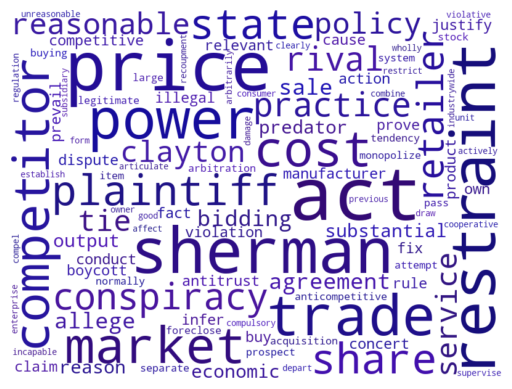

In [59]:
###
# LDA Word Clouds
###

from numpy.random import randint
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# make directory if not exists
from os import mkdir
try:
    mkdir('lda')
except:
    pass

# make word clouds for the topics
for i,weights in lda.show_topics(num_topics=-1,
                                 num_words=100,
                                 formatted=False):
    
    #logweights = [w[0], np.log(w[1]) for w in weights]
    maincol = randint(0,360)
    def colorfunc(word=None, font_size=None, 
                  position=None, orientation=None, 
                  font_path=None, random_state=None):   
        color = randint(maincol-10, maincol+10)
        if color < 0:
            color = 360 + color
        return "hsl(%d, %d%%, %d%%)" % (color,randint(65, 75)+font_size / 7, randint(35, 45)-font_size / 10)   

    
    wordcloud = WordCloud(background_color="white", 
                          ranks_only=False, 
                          max_font_size=120,
                          color_func=colorfunc,
                          height=600,width=800).generate_from_frequencies(dict(weights))

    plt.clf()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [24]:
observacion = df['rule_of_law'].iloc[16]    
observacion  

'Merely alleging that information dissemination has the potential to cause price regulation does not establish a Sherman Act violation. '